**Цель работы:**

Изучение связи между признаками двумерного набора данных,
визуализация данных

Вариант №9

Набор данных: visits2.csv

### 1. Загрузка, первичный анализ и предобработка данных

In [27]:
# Импорт основных библиотек для анализа данных и визуализации и чтение файла
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('visits2.csv', sep=';')
# Вывод первых 5 строк
display(df.head())

,user_id,region,device,channel,session_start,session_end,time_session,click_count,buy_count,price,age
0,278965908054,United States,iPhone,organic,01.05.2019 4:46,01.05.2019 4:47,1.00000,0.00000,0.00000,0.00000,31
1,244878945432,United States,Mac,organic,01.05.2019 16:44,01.05.2019 16:45,1.00000,0.00000,0.00000,0.00000,40
2,590706206550,United States,Mac,organic,01.05.2019 14:09,01.05.2019 15:32,83.00000,28.00000,6.00000,14570.00000,50
3,326433527971,United States,Android,TipTop,01.05.2019 0:29,01.05.2019 0:54,25.00000,8.00000,3.00000,4411.00000,38
4,349773784594,United States,Mac,organic,01.05.2019 3:33,01.05.2019 3:57,24.00000,8.00000,3.00000,4411.00000,63


1.2 Оценка датасета через info и describe, проверка на дубликаты и заполнение пропусков.

In [28]:
# Вывод общей информации через info
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        954 non-null    int64  
 1   region         953 non-null    object 
 2   device         953 non-null    object 
 3   channel        954 non-null    object 
 4   session_start  954 non-null    object 
 5   session_end    954 non-null    object 
 6   time_session   954 non-null    float64
 7   click_count    954 non-null    float64
 8   buy_count      954 non-null    float64
 9   price          954 non-null    float64
 10  age            954 non-null    int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 82.1+ KB


None

In [29]:
# Вывод описательной статистики
# Настроен формат вывода до 5 символа после запятой
pd.set_option('display.float_format', '{:.5f}'.format)
display(df.describe())

# Проверка на наличие дубликатов
print('Дубликатов: ', df.duplicated().sum())

,user_id,time_session,click_count,buy_count,price,age
count,954.00000,954.00000,954.00000,954.00000,954.00000,954.00000
mean,495180693122.14673,29.06289,9.83019,2.52725,5341.55975,39.81027
std,289948785669.78723,27.13482,9.20904,1.60200,5060.24769,13.03803
min,2346324608.00000,0.00000,0.00000,0.00000,0.00000,10.00000
25%,229512214402.25000,9.00000,3.00000,2.00000,2301.00000,29.00000
50%,498426656077.00000,21.00000,7.00000,2.00000,3739.00000,39.00000
75%,752533181698.50000,42.00000,14.00000,3.00000,7284.00000,50.00000
max,998513020664.00000,262.00000,88.00000,15.00000,56546.00000,71.00000


Дубликатов:  0


In [30]:
# Проверка на пропуски
missing_data = df.isna().sum()
print(missing_data[missing_data > 0])

region    1
device    1
dtype: int64


In [31]:
# Заполнение пропусков модой
mode_region = df['region'].mode()[0]
df['region'].fillna(mode_region, inplace=True)

mode_device = df['device'].mode()[0]
df['device'].fillna(mode_device, inplace=True)
print(f"Пропуски были заполнены модой, для region {mode_region}, для device {mode_device}")

Пропуски были заполнены модой, для region United States, для device iPhone


C:\Users\fedor\AppData\Local\Temp\ipykernel_48856\2154328766.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['region'].fillna(mode_region, inplace=True)
C:\Users\fedor\AppData\Local\Temp\ipykernel_48856\2154328766.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

1.3 Проверка и изменение неявных дубликатов

In [32]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Создаем словарь для хранения уникальных значений каждого категориального столбца

# Анализируем каждый категориальный столбец
for column in categorical_columns:
    print(f"Анализ столбца: {column}")
    # Получаем частоту каждого значения
    value_counts = df[column].value_counts()
    print(value_counts)
        
# Создаем копию DataFrame для безопасного изменения
df_clean = df.copy()

Анализ столбца: region
region
United States    901
Russia            52
USA                1
Name: count, dtype: int64
Анализ столбца: device
device
iPhone     420
Mac        243
Android    185
PC         103
IPHONE       2
MAC          1
Name: count, dtype: int64
Анализ столбца: channel
channel
organic         610
FaceBoom        149
TipTop          142
MediaTornado     53
Name: count, dtype: int64
Анализ столбца: session_start
session_start
02.05.2019 9:40     4
02.05.2019 20:16    4
02.05.2019 1:22     4
02.05.2019 22:44    4
02.05.2019 13:55    3
                   ..
02.05.2019 13:43    1
03.05.2019 18:54    1
02.05.2019 11:59    1
02.05.2019 12:05    1
02.05.2019 21:07    1
Name: count, Length: 819, dtype: int64
Анализ столбца: session_end
session_end
02.05.2019 2:40     3
01.05.2019 7:49     3
02.05.2019 4:30     3
02.05.2019 20:13    3
02.05.2019 8:09     3
                   ..
01.05.2019 11:05    1
03.05.2019 9:11     1
04.05.2019 18:06    1
04.05.2019 6:19     1
03.05.2019 3

In [33]:
# Заменяем значения на правильные
df_clean['region'] = df['region'].replace('USA', 'United States')

print("Обновленное распределение значений в region:")
display(df_clean['region'].value_counts())

df_clean['device'] = df['device'].replace({'IPHONE': 'iPhone', 'MAC': 'Mac'})

print("Обновленное распределение значений в device:")
display(df_clean['device'].value_counts())

# Теперь присваиваем очищенный DataFrame обратно в df
df = df_clean

Обновленное распределение значений в region:


region
United States    902
Russia            52
Name: count, dtype: int64

Обновленное распределение значений в device:


device
iPhone     422
Mac        244
Android    185
PC         103
Name: count, dtype: int64

1.4 Проверка и изменение типов данных

In [34]:
display(df.dtypes)

user_id            int64
region            object
device            object
channel           object
session_start     object
session_end       object
time_session     float64
click_count      float64
buy_count        float64
price            float64
age                int64
dtype: object

In [35]:
# Конвертируем столбцы с количественными данными
copy_df = df.copy()
for col in ['time_session' ,'click_count', 'buy_count', 'price']:
    # Проверка точно ли все числа в столбце целые
    if (copy_df[col] % 1 == 0).all():
        copy_df[col] = copy_df[col].astype('int64')

# Список категориальных столбцов
categorical_columns = ['region', 'device', 'channel']
# Конвертируем категориальные столбцы
for col in categorical_columns:
    copy_df[col] = copy_df[col].astype('category')

df = copy_df
print("Итоговые типы данных:")
display(df.dtypes)


Итоговые типы данных:


user_id             int64
region           category
device           category
channel          category
session_start      object
session_end        object
time_session        int64
click_count         int64
buy_count           int64
price               int64
age                 int64
dtype: object


 #### Промежуточный вывод о данных
Данные содержат 954 записи о сессиях интернет-магазина с 11 признаками, включая уникальный идентификатор пользователя, страна пользователя, устройство пользователя, идентификатор рекламного источника, из которого пришел пользователь, дата и время начала сессии, дата и время окончания сессии, время сессии в минутах, кол-во кликов пользователя, количество товаров в корзине, стоимость покупок и возраст пользователя.

Пропуски: region и device — по 1 пропущенному значению.

Были неявные дубликаты: USA вместо United States, IPHONE вместо iPhone и MAC вместо Mac. Эти дубликаты были исправлены

Типы данных были заменены, так как не подходили к самим данным. time_session, click_count, buy_count и price были заменены на int64, так как по данным было видно, что все они целочисленные. region, device и channel были заменены на категориальный тип данных, так как там есть строго ограниченный набор значений.


### 2. Построение диаграмм

2.1 Построение точечной диаграммы

Матрица диаграмм рассеяния:


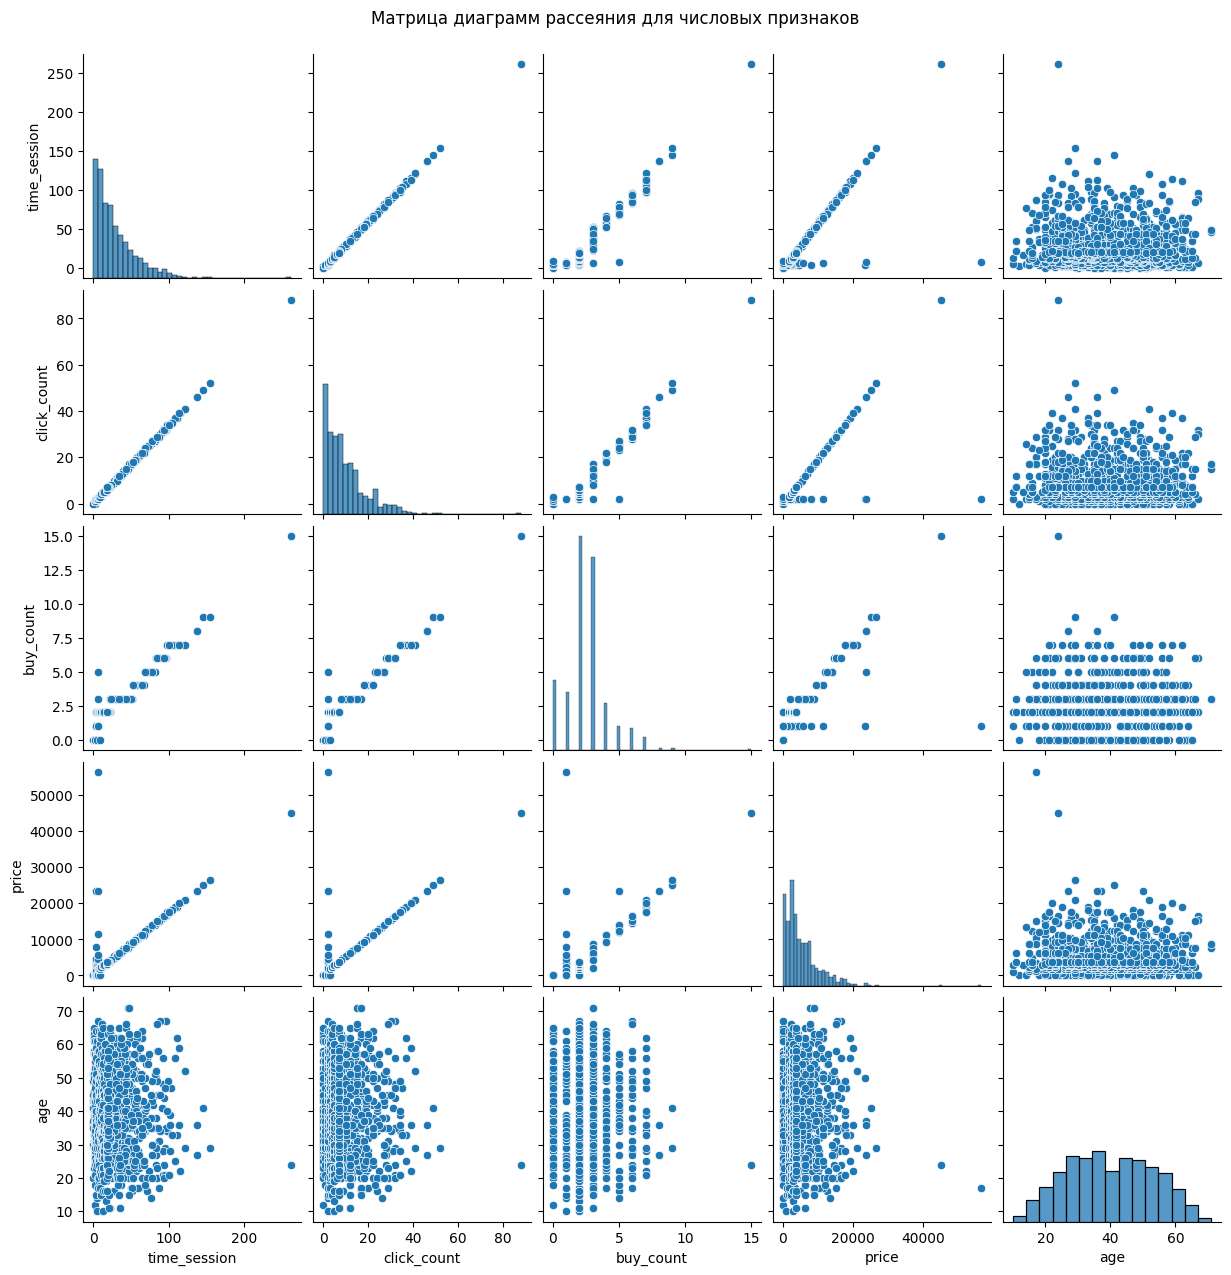

Диаграмма рассеяния: Зависимость стоимости покупки от возрасту по устройствам


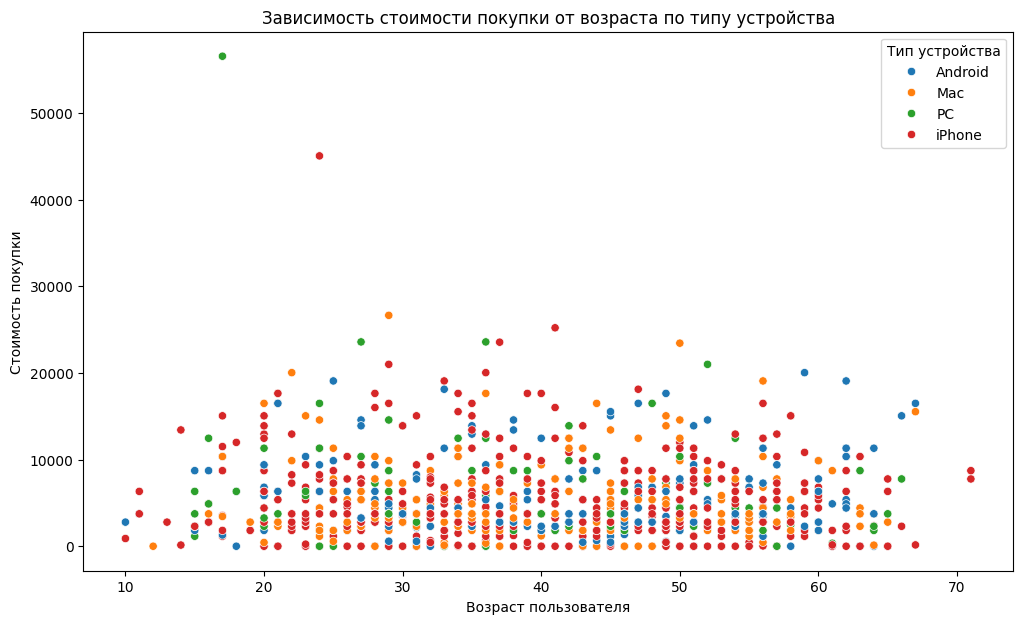

In [36]:
# Построение матрицы диаграмм рассеяния для числовых признаков
print("Матрица диаграмм рассеяния:")
sns.pairplot(df[['time_session', 'click_count', 'buy_count', 'price', 'age']])
plt.suptitle('Матрица диаграмм рассеяния для числовых признаков', y=1.02)
plt.show()

# Зависимость стоимости покупки от возраста пользователя по используемому устройству
print("Диаграмма рассеяния: Зависимость стоимости покупки от возрасту по устройствам")
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='age', y='price', hue='device')
plt.title('Зависимость стоимости покупки от возраста по типу устройства')
plt.xlabel('Возраст пользователя')
plt.ylabel('Стоимость покупки')
plt.legend(title='Тип устройства')
plt.show()


 ## Промежуточный вывод о данных
- Видны прямые корреляции времени сессии и количества кликов, количества товаров в корзине и суммы покупок. Чем больше время сессии, тем выше все эти показатели, аналогично с количеством кликов, чем их больше, тем больше товаров в корзине и больше сумма покупок.
- Между временем сессии и возрастом сильных корреляций нет, разве что видны просадки в 30 и 55 лет и после 60 сильный спад, это объясняется тем, что люди, которым больше 60 лет намного реже сидят в интернете и заходят в интернет-магазины.
- На графике по категориям видно, что стоимости покупок выше всего в 20-40 лет, это объясняется тем, что в этом возрасте люди совершают много покупок и у них есть на это возможность, также наблюдается небольшая аномалия в 50 лет, стоимость резко возрастает, а потом опять падает
- Видна корреляция стоимости покупок и вида девайса, дорогие покупки чаще совершаются с помощью iPhone и Mac.


2.2 Построение гистограмм для каждого числового признака

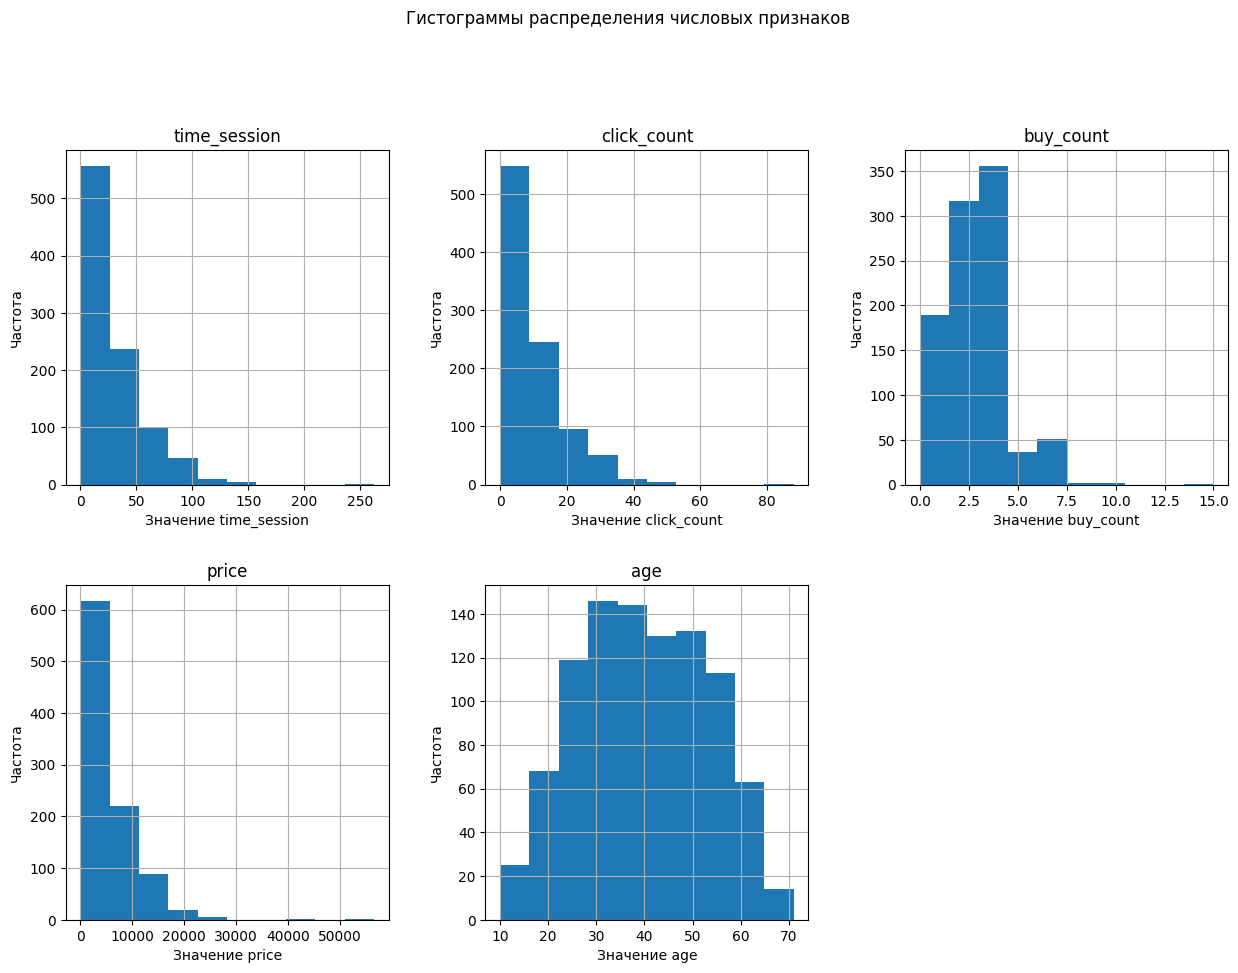

In [37]:
# Выбраны только числовые столбцы для построения гистограмм
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Удаленен столбец user_id, так как это идентификатор
numeric_cols.remove('user_id ')

# Построение гистограмм для каждого числового признака
axes = df[numeric_cols].hist(bins=10, figsize=(15, 10), layout=(2, 3))

# Добавление подписей к осям
for ax, col in zip(axes.flatten(), numeric_cols):
    ax.set_xlabel(f'Значение {col}')
    ax.set_ylabel('Частота')
plt.suptitle('Гистограммы распределения числовых признаков', y=1.02)
plt.show()



 ## Промежуточный вывод о данных
Распределение возраста близко к нормальному с пиком около 35 лет, что указывает на основную целевую аудиторию - людей 25-45 лет. Однако заметен неожиданный спад в районе 40 лет, который может быть связан с особенностями привлечения или поведения этой возрастной группы. Стоимость покупок сильно смещена вправо: большинство транзакций - недорогие, а дорогие покупки встречаются редко, но сильно влияют на средний чек. Аналогично, длительность сессий и количество кликов также имеют правостороннее смещение - большинство пользователей взаимодействуют с платформой кратковременно и совершают мало действий. Это говорит о том, что пользователи, как правило, приходят с чёткой целью и быстро завершают сессию.


2.3 Построение тепловой карты корреляции.

,time_session,click_count,buy_count,price,age
time_session,1.00000,0.99913,0.94649,0.90469,-0.03628
click_count,0.99913,1.00000,0.94878,0.90549,-0.03519
buy_count,0.94649,0.94878,1.00000,0.87386,-0.03484
price,0.90469,0.90549,0.87386,1.00000,-0.05498
age,-0.03628,-0.03519,-0.03484,-0.05498,1.00000


,time_session,click_count,buy_count,price,age
time_session,736.29824,249.66861,41.14414,124222.37609,-12.83695
click_count,249.66861,84.80639,13.99729,42195.87060,-4.22533
buy_count,41.14414,13.99729,2.56641,7083.97424,-0.72777
price,124222.37609,42195.87060,7083.97424,25606106.63494,-3627.07102
age,-12.83695,-4.22533,-0.72777,-3627.07102,169.99020


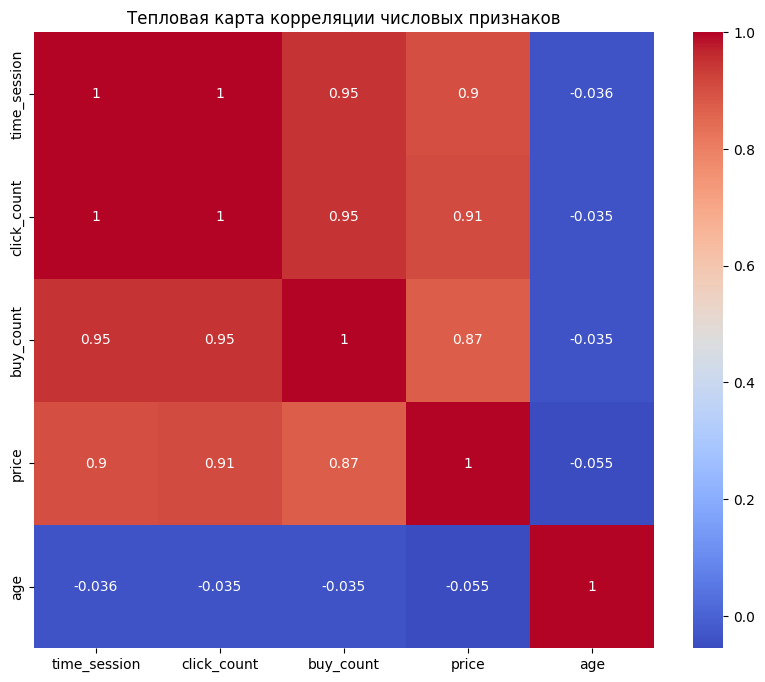

In [38]:
# Вычисление матрицы корреляций
correlation_matrix = df[numeric_cols].corr()
covariance = df[numeric_cols].cov()
display(correlation_matrix)
display(covariance)

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Тепловая карта корреляции числовых признаков')
plt.show()


## Промежуточный вывод о данных
Корреляция:
- Высокая линейная взаимосвязь видна между всеми признаками, кроме возраста, видно, что он никак не влияет ни на какие показатели
- Больше всего коррелируют время сессии и количество кликов

Ковариация:
- Большинство пар переменных имеют положительную ковариацию. Это подтверждает то, что эти переменные имеют тенденцию изменяться в одном направлении. Большие значения ковариации, особенно с price, указывают на то, что price имеет значительно больший разброс значений по сравнению с другими переменными, что усиливает абсолютное значение ковариации.
- age со всеми остальными переменными имеет отрицательную ковариацию. Отрицательная ковариация с age согласуется с отрицательной корреляцией. Это означает, что с увеличением возраста другие показатели имеют тенденцию к снижению, хотя сила этой связи, как показала корреляция, очень мала.

### 3. Выполнение заданий варианта

#### Задание 1 По группировке - region и количество клиентов, привлеченных из рекламных источников каждого типа

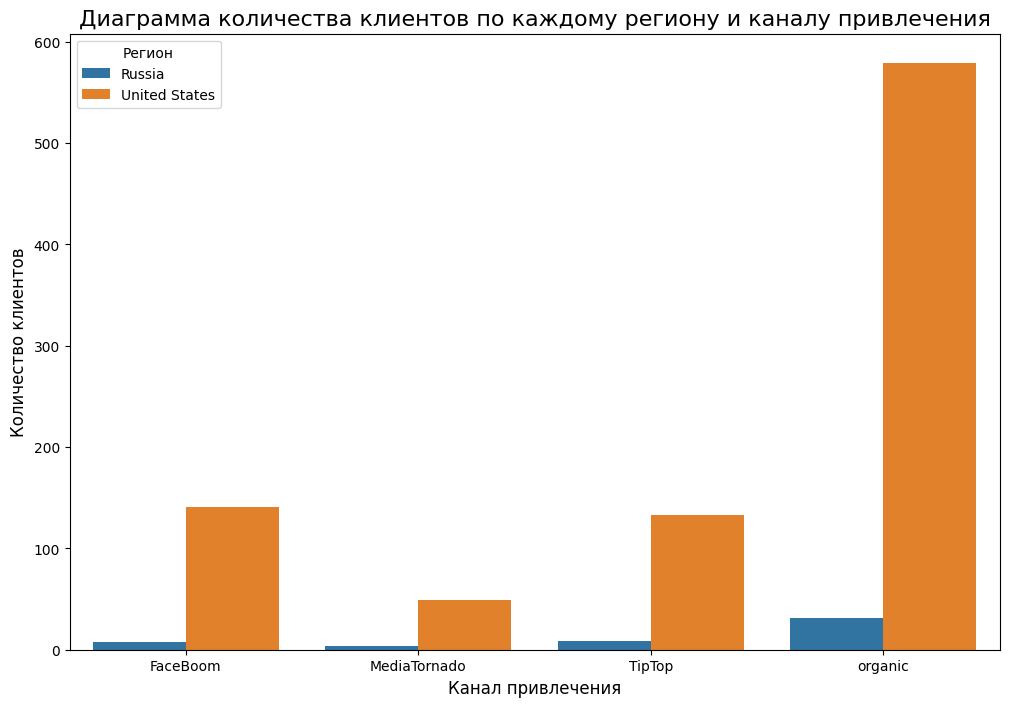

In [39]:
# Группировка данных и построение
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='channel', hue='region')

# Настройка графика
plt.title('Диаграмма количества клиентов по каждому региону и каналу привлечения', fontsize=16)
plt.xlabel('Канал привлечения', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)
plt.legend(title='Регион')
plt.show()

#### Выводы
Наибольшее количество клиентов привлекается через органический трафик (organic), что говорит о сильной вовлечённости и узнаваемости бренда. На втором месте - каналы TipTop и FaceBoom, которые показывают схожую эффективность, а MediaTornado отстаёт по объёму привлечения. При этом, несмотря на то, что в США клиентов значительно больше, распределение по источникам привлечения в обеих странах практически идентично - это указывает на универсальность маркетинговых стратегий и их одинаковую эффективность как в России, так и в США. Такая стабильность позволяет масштабировать кампании без необходимости локализации подхода под каждый регион.


#### Задание 2 . По сводной таблице (pivot_table) - отобразить уникальное (nunique) количество пользователей для каждого канала (channel). Оставить только маркеры в виде 🞀 синего цвета размером 15

C:\Users\fedor\AppData\Local\Temp\ipykernel_48856\1094427244.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  unique_users_by_channel = df.pivot_table(index='channel', values='user_id ', aggfunc='nunique')


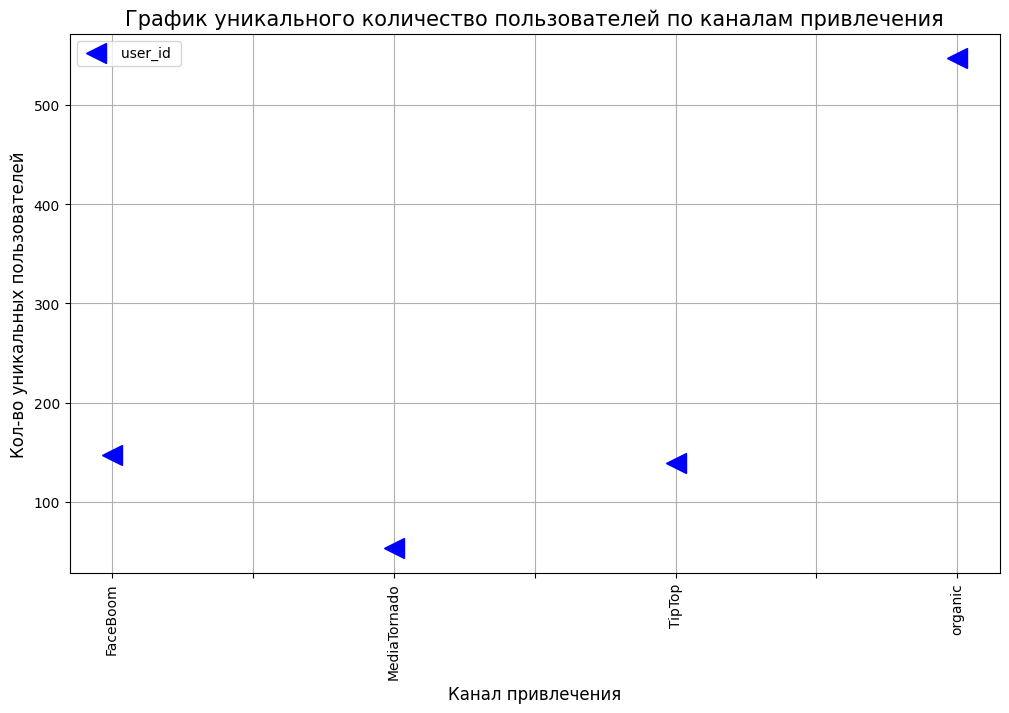

In [40]:
# Создание сводной таблицы
unique_users_by_channel = df.pivot_table(index='channel', values='user_id ', aggfunc='nunique')
plt.figure(figsize=(12, 7))

# Создание графика
unique_users_by_channel.plot(marker='<', color='b', markersize=15, linestyle='None', grid=True, ax=plt.gca())

# Настройка графика
plt.title('График уникального количество пользователей по каналам привлечения', fontsize=15)
plt.xlabel('Канал привлечения', fontsize=12)
plt.ylabel('Кол-во уникальных пользователей', fontsize=12)
plt.xticks(rotation=90)
plt.show()

#### Выводы
Этот график подтверждает, что organic - абсолютный лидер по привлечению уникальных пользователей, значительно опережая остальные каналы. На втором месте - FaceBoom и TipTop, которые показывают схожий уровень привлечения, а MediaTornado остаётся на последнем месте, привлекая минимальное количество уникальных клиентов. Это говорит о том, что органический трафик не только самый массовый, но и наиболее эффективен в плане охвата новой аудитории. В то же время слабая позиция MediaTornado может указывать на низкую релевантность или неэффективность рекламных кампаний в этом канале - стоит пересмотреть его бюджет или стратегию.

#### Задание 3 Построить круговую диаграмму, которая отображает процент каждого устройства

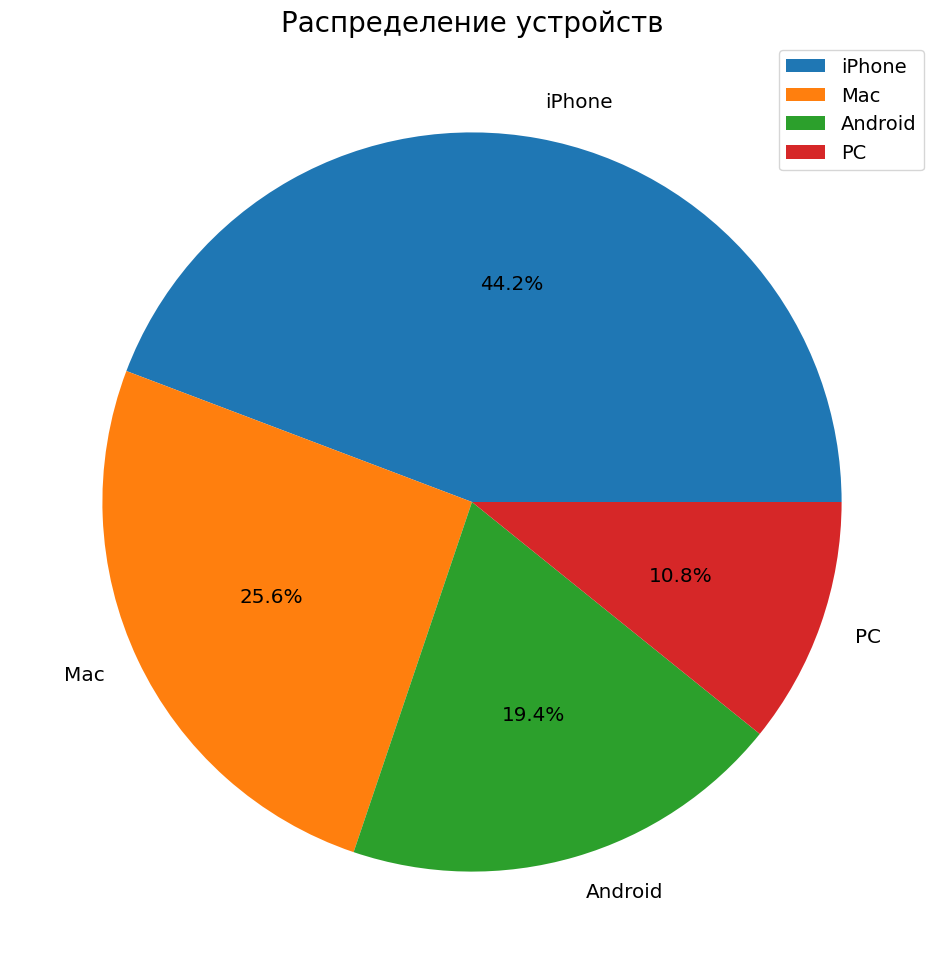

In [41]:
# Подсчет количества сессий для каждого устройства
device_counts = df['device'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(12, 12))
plt.pie(device_counts, labels=device_counts.index, autopct='%.1f%%', textprops={'size': 'x-large'})

# Настройка графика
plt.title('Распределение устройств', fontsize=20)
plt.legend(fontsize=14, bbox_to_anchor=(1, 1))
plt.show()

#### Выводы:
Наиболее популярным устройством среди клиентов является iPhone (44.2%), что указывает на сильную ориентацию аудитории на экосистему Apple. На втором месте - Mac (25.6%), что вместе с iPhone даёт более 70% пользователей, использующих продукцию Apple. Это может говорить о высокой покупательной способности. Android занимает третье место (19.4%), а PC - последнее (10.8%), что свидетельствует о низкой вовлечённости пользователей с десктопов - возможно, из-за неудобства интерфейса или меньшей мобильности. Рекомендуется уделить внимание оптимизации под iOS и macOS, а также изучить причины низкого использования PC - возможно, стоит адаптировать сайт или приложение под десктопных пользователей.

### 4. Дальнейшее построение графиков и диаграмм

4.1 Hexagonal binning диаграмма зависимости стоимости покупки от возраста

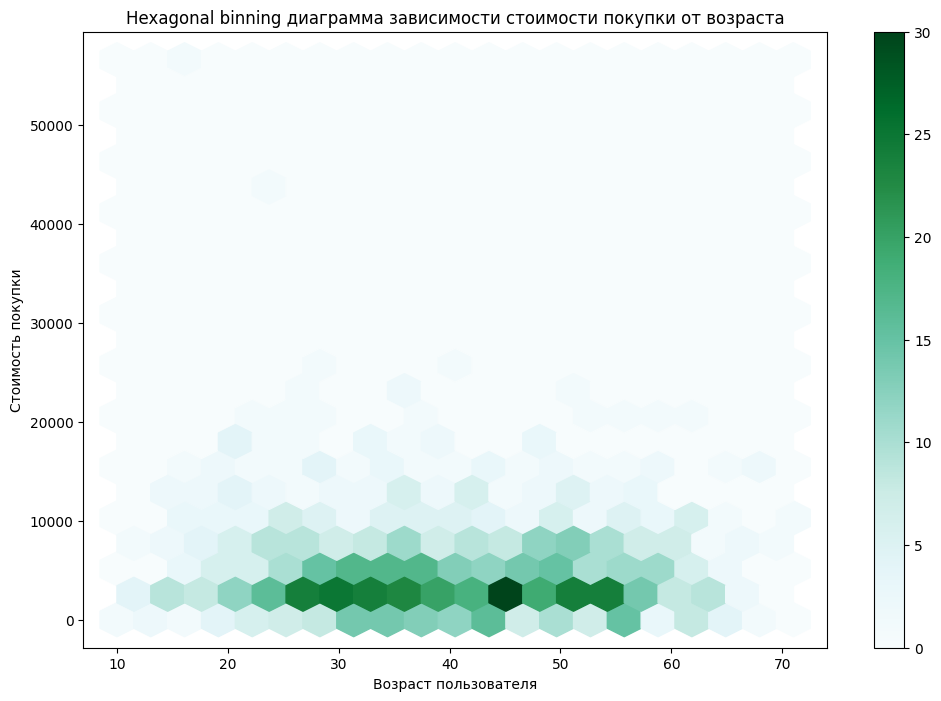

In [42]:
# Построение hexagonal binning plot
df.plot(kind='hexbin', x='age', y='price', gridsize=20, figsize=(12, 8))
# Настройка диаграммы
plt.title('Hexagonal binning диаграмма зависимости стоимости покупки от возраста')
plt.xlabel('Возраст пользователя')
plt.ylabel('Стоимость покупки')
plt.show()

#### Выводы
Наибольшая плотность наблюдений, отмеченная самыми тёмными шестиугольниками, сосредоточена в диапазоне возраста 25–55 лет и стоимости покупок до 15 000, что указывает на основную целевую аудиторию - зрелых пользователей, совершающих частые, но недорогие покупки. Это подтверждает выводы из гистограмм: большинство клиентов - не молодёжь и не пожилые, а активные взрослые, чьи расходы умеренны. При этом практически нет «тяжёлых» покупателей (выше 30 000) в любом возрасте - это говорит о том, что продукт или сервис ориентирован на массовый спрос, а не на премиум-сегмент.

4.2 Диаграмма размаха для стоимости покупок

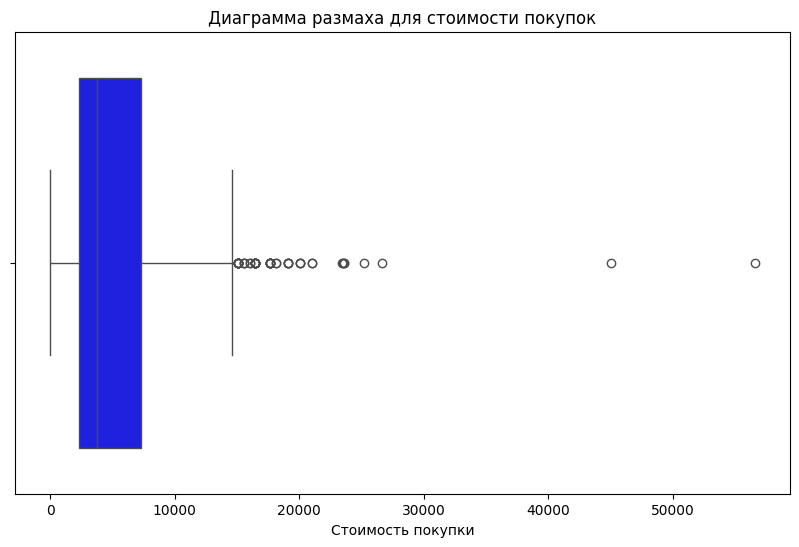

In [43]:
# Построение boxplot для стоимости покупок
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'], color='blue')
# Настройка диаграммы
plt.title('Диаграмма размаха для стоимости покупок')
plt.xlabel('Стоимость покупки')
plt.show()

#### Выводы
Этот boxplot показывает, что медианная стоимость покупки - около 4000, а 50% всех транзакций (межквартильный размах) приходится на диапазон от 3000 до 7000, что подтверждает вывод о преобладании недорогих покупок. При этом видны выбросы - отдельные очень дорогие покупки (до 55 000), которые сильно смещают среднее значение вверх, но не влияют на медиану. Это значит, что основной поток клиентов совершает типичные, умеренные по цене покупки, а высокие чеки - редкие исключения.

4.3 Создание категории возрастная группа и построение boxplot по ней

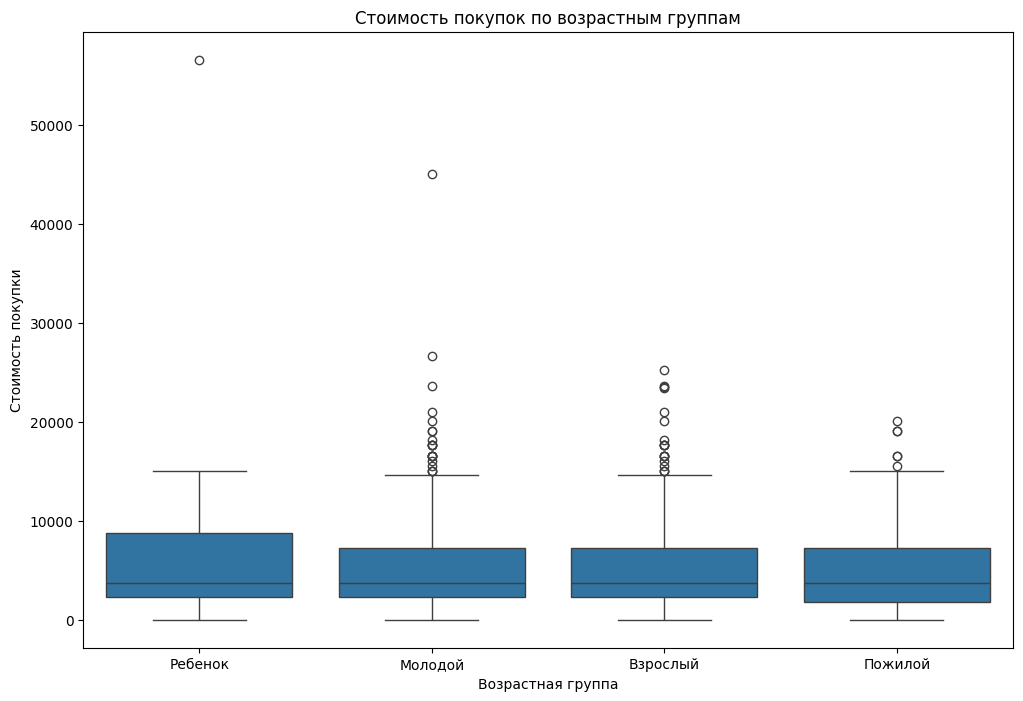

In [44]:
# Создание новой категориальной переменной age_group
bins = [0, 18, 35, 55, 100]
labels = ['Ребенок', 'Молодой', 'Взрослый', 'Пожилой']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Построение boxplot стоимости покупки по возрастным группам
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='age_group', y='price')
plt.title('Стоимость покупок по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Стоимость покупки')
plt.show()

#### Выводы
Из графика видно, что медианная стоимость покупки практически одинакова во всех возрастных группах - около 4000–5000, что говорит о схожем уровне типичных трат. Однако разброс цен и количество выбросов сильно различаются: у «Молодой» и «Взрослый» групп наблюдается наибольшая вариативность - от низкобюджетных до очень дорогих покупок (до 55 000). Это может указывать на более высокую покупательную способность или разнообразие потребностей в этих группах - например, они могут делать как повседневные покупки, так и крупные. В то же время группы «Ребёнок» и «Пожилой» демонстрируют более узкий диапазон цен, что может говорить о меньшей финансовой свободе или ограниченных интересах.

4.4 Создание двух boxplot: время сессии по типу устройства (используя Seaborn), стоимость покупки по каналу привлечения (используя Matplotlib) 

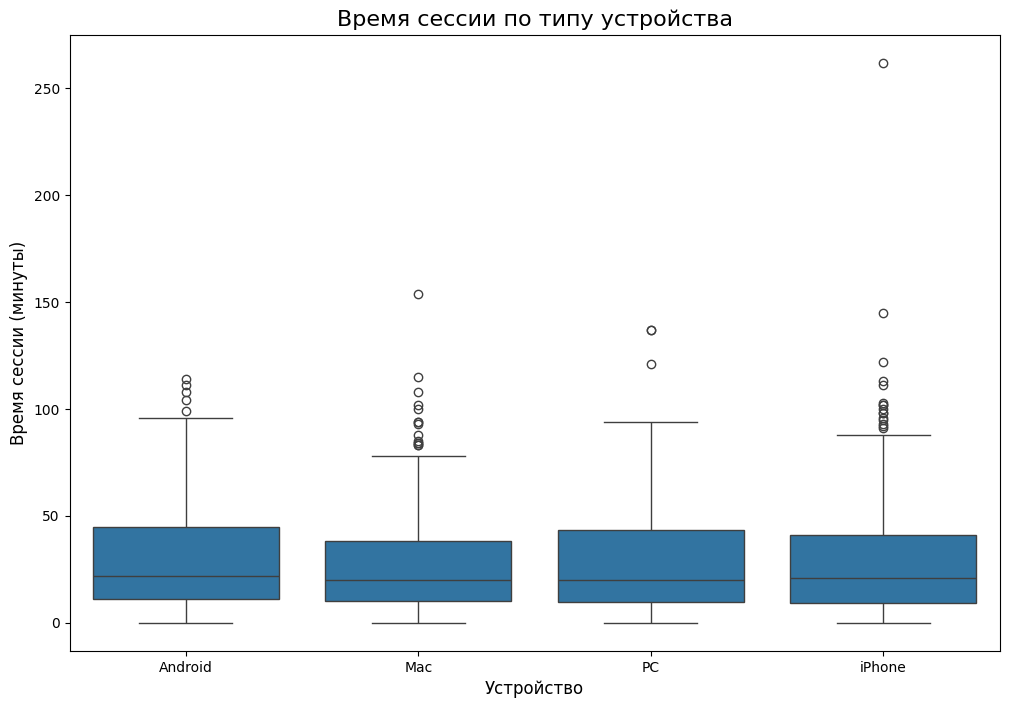

In [45]:
# Создание и настройка графика Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='device', y='time_session')
plt.title('Время сессии по типу устройства', fontsize=16)
plt.xlabel('Устройство', fontsize=12)
plt.ylabel('Время сессии (минуты)', fontsize=12)
plt.show()

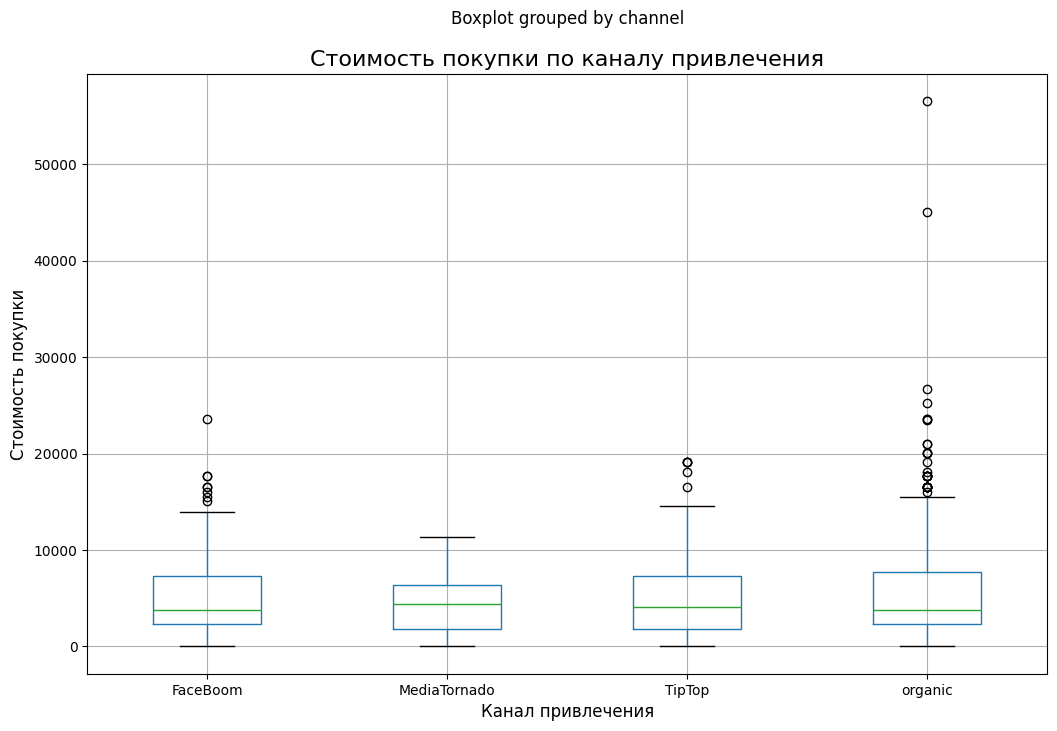

In [53]:
# Создание и настройка графика MatPlotLib
df.boxplot(column='price', by='channel', figsize=(12, 8))
plt.title('Стоимость покупки по каналу привлечения', fontsize=16)
plt.xlabel('Канал привлечения', fontsize=12)
plt.ylabel('Стоимость покупки', fontsize=12)
plt.show()

#### Выводы
- Медианное время сессии самое высокое у пользователей iPhone и Android. Пользователи PC и Mac в среднем проводят на сайте меньше времени. Больше всего выбросов у пользователей с iPhone и Mac
- Этот график показывает, что медианная стоимость покупки примерно одинакова для всех каналов. Однако из MediaTornado приходит хоть и мало пользователей, но все совершают довольно дорогие покупки, но на удивление в этом источнике нет ни одного выброса.
- Больше всего выбросов у пользователей, пришедших  из organic, там же и самая низкая медиана, скорее всего из-за того что оттуда пришло больше всего пользователей

#### Дополнительное задание: 
Последний boxplot график сделать без выбросов, удалить их и отобразить. Удалить по группам, а не столбцу

C:\Users\fedor\AppData\Local\Temp\ipykernel_48856\1452958444.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  q1 = df.groupby('channel')['price'].transform('quantile', 0.25)
C:\Users\fedor\AppData\Local\Temp\ipykernel_48856\1452958444.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  q3 = df.groupby('channel')['price'].transform('quantile', 0.75)


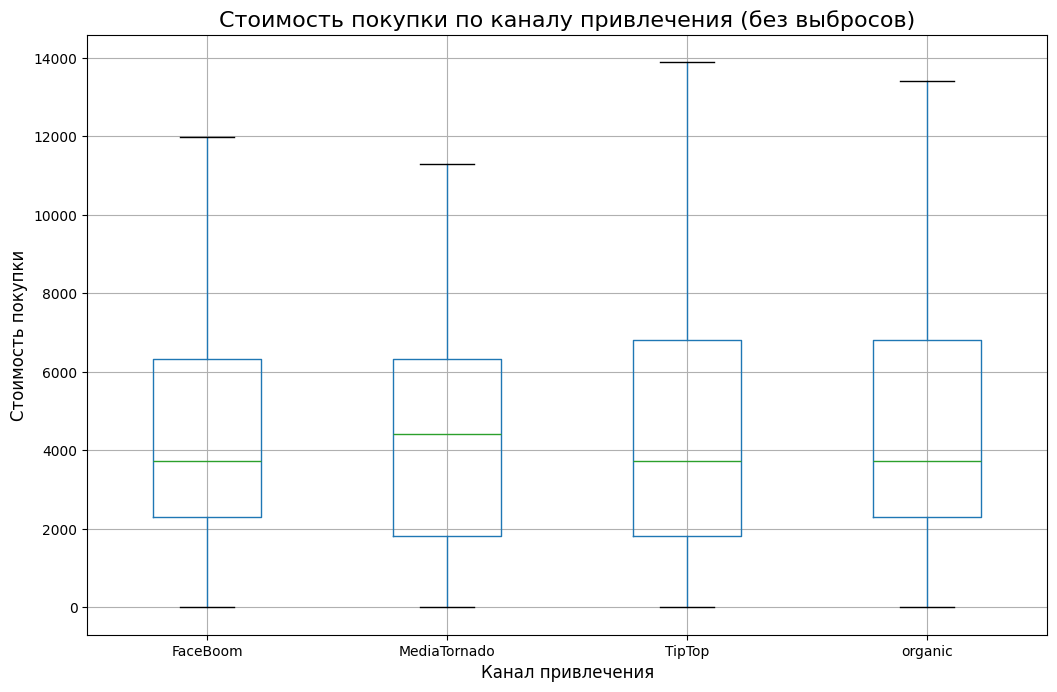

In [ ]:
# Вычисление Q1 и Q3 по каналу
q1 = df.groupby('channel')['price'].transform('quantile', 0.25)
q3 = df.groupby('channel')['price'].transform('quantile', 0.75)
iqr = q3 - q1
# Оставляем только те строки, где price не является выбросом в своей группе
df_clean = df[(df['price'] >= q1 - 1.5 * iqr) & (df['price'] <= q3 + 1.5 * iqr)]

# Построение boxplot без отображения выбросов с помощью showfliers=False
# Можно построить с ними заменив на True, но первоначальные выбросы все равно были удалены
df_clean.boxplot(column='price', by='channel', figsize=(12, 8), showfliers=False)
plt.title('Стоимость покупки по каналу привлечения (без выбросов)', fontsize=16)
plt.xlabel('Канал привлечения', fontsize=12)
plt.ylabel('Стоимость покупки', fontsize=12)
plt.suptitle('')
plt.show()

# Общие выводы по работе

В ходе выполнения лабораторной работы был проведен анализ данных пользовательских сессий в интернет-магазине. Было произведено ознакомление с различными видами диаграмм и способами их построений.

Данные: Исходный датасет visits2.csv содержал несколько пропусков и неявных дубликатов, которые были заменены или исправлены, были изменены типы данных, так как изначально они были неподходящими, например тип float для целочисленных данных и тип object для данных, где может быть строго ограниченное число вариантов данных.

Портрет пользователя: типичный пользователь — это человек в возрасте 25–55 лет, заходящий на сайт с устройства Apple (iPhone или Mac) из США. Большинство сессий короткие, с небольшим количеством кликов и покупок на малую сумму.

Зависимости: была выявлена сильная положительная корреляция между всеми числовыми признаками кроме возраста, например, чем больше время сессии, тем больше кликов, товаров в корзине и выше сумма покупок.

Каналы и устройства: наиболее эффективным каналом привлечения как по общему количеству, так и по уникальным пользователям является organic. Самые дорогие покупки в среднем совершаются клиентами, пришедшими из MediaTornado, но organic приводит больше клиентов, готовых заплатить больше нормы (выбросы), и пользователями, использующими Mac и iPhone.